In [1]:
import pandas as pd
import numpy as np

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

import matplotlib.pyplot as plt


In [2]:
movies = pd.read_csv('movies.csv')
movies.head()


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [3]:
movies.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62423 entries, 0 to 62422
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  62423 non-null  int64 
 1   title    62423 non-null  object
 2   genres   62423 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.4+ MB


In [4]:
movies.isnull().sum()


movieId    0
title      0
genres     0
dtype: int64

In [5]:
movies['genres'] = movies['genres'].str.replace('|', ' ', regex=False)
movies.head()


,movieId,title,genres
0,1,Toy Story (1995),Adventure Animation Children Comedy Fantasy
1,2,Jumanji (1995),Adventure Children Fantasy
2,3,Grumpier Old Men (1995),Comedy Romance
3,4,Waiting to Exhale (1995),Comedy Drama Romance
4,5,Father of the Bride Part II (1995),Comedy


In [10]:
vectorizer = CountVectorizer(stop_words='english')
genre_matrix = vectorizer.fit_transform(movies['genres'])


In [25]:
def recommend_movies(movie_title, num_recommendations=10):
    if movie_title not in movies['title'].values:
        return "Movie not found in dataset."
    
    idx = movies[movies['title'] == movie_title].index[0]
    
    similarity_scores = list(enumerate(cosine_sim[idx]))
    similarity_scores = sorted(similarity_scores, key=lambda x: x[1], reverse=True)
    
    top_movies = similarity_scores[1:num_recommendations+1]
    
    movie_indices = [i[0] for i in top_movies]
    
    return movies.iloc[movie_indices][['title', 'genres']]


In [27]:
from sklearn.metrics.pairwise import cosine_similarity

def recommend_movies(movie_title, num_recommendations=10):
    if movie_title not in movies['title'].values:
        return "Movie not found in dataset."
    
    idx = movies[movies['title'] == movie_title].index[0]
    
    # Compute similarity ONLY for selected movie
    sim_scores = cosine_similarity(
        genre_matrix[idx], genre_matrix
    ).flatten()
    
    similar_indices = sim_scores.argsort()[::-1][1:num_recommendations+1]
    
    result = movies.iloc[similar_indices][['title', 'genres']].copy()
    result['similarity_score'] = sim_scores[similar_indices]
    
    return result


In [42]:
recommended_df = recommend_movies("Toy Story (1995)", 15)
recommended_df

,title,genres,similarity_score
57586,Dragons: Dawn Of The Dragon Racers (2014),Adventure Animation Children Comedy Fantasy,1.0
59328,Wonder Park (2019),Adventure Animation Children Comedy Fantasy,1.0
3912,"Emperor's New Groove, The (2000)",Adventure Animation Children Comedy Fantasy,1.0
22634,Toy Story Toons: Small Fry (2011),Adventure Animation Children Comedy Fantasy,1.0
22633,Toy Story Toons: Hawaiian Vacation (2011),Adventure Animation Children Comedy Fantasy,1.0
48614,Puss in Book: Trapped in an Epic Tale (2017),Adventure Animation Children Comedy Fantasy,1.0
22353,"Boxtrolls, The (2014)",Adventure Animation Children Comedy Fantasy,1.0
22286,Aladdin (1992),Adventure Animation Children Comedy Fantasy,1.0
50701,Olaf's Frozen Adventure (2017),Adventure Animation Children Comedy Fantasy,1.0
3653,"Adventures of Rocky and Bullwinkle, The (2000)",Adventure Animation Children Comedy Fantasy,1.0


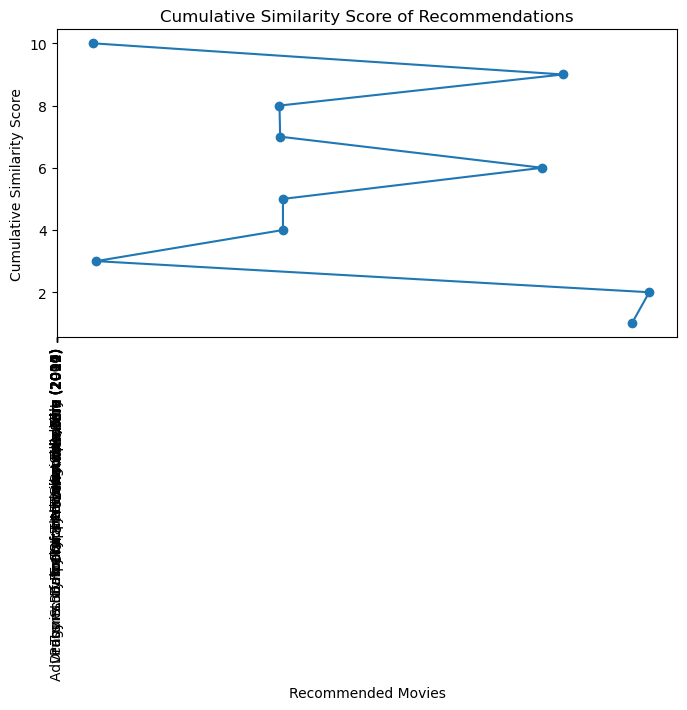

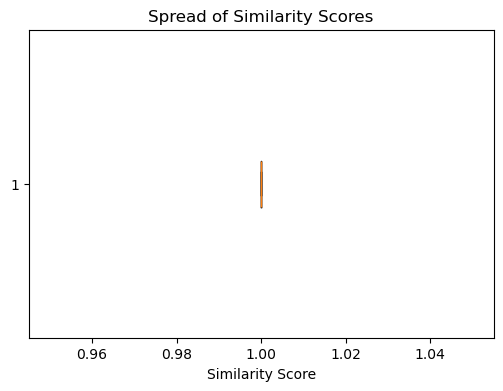

In [31]:
plt.figure(figsize=(6,4))
plt.boxplot(recommended_df['similarity_score'], vert=False)
plt.xlabel("Similarity Score")
plt.title("Spread of Similarity Scores")
plt.show()


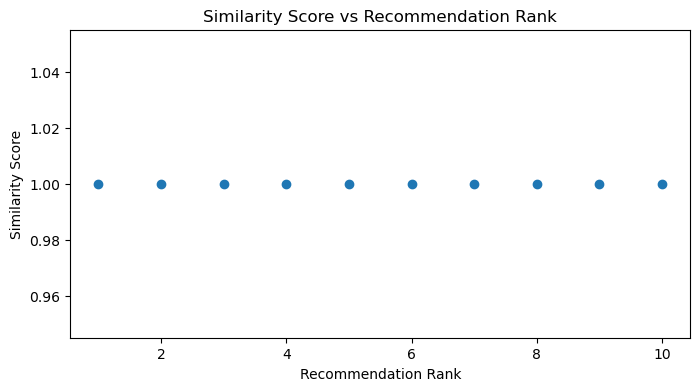

In [32]:
plt.figure(figsize=(8,4))
plt.scatter(range(1, len(recommended_df)+1),
            recommended_df['similarity_score'])
plt.xlabel("Recommendation Rank")
plt.ylabel("Similarity Score")
plt.title("Similarity Score vs Recommendation Rank")
plt.show()


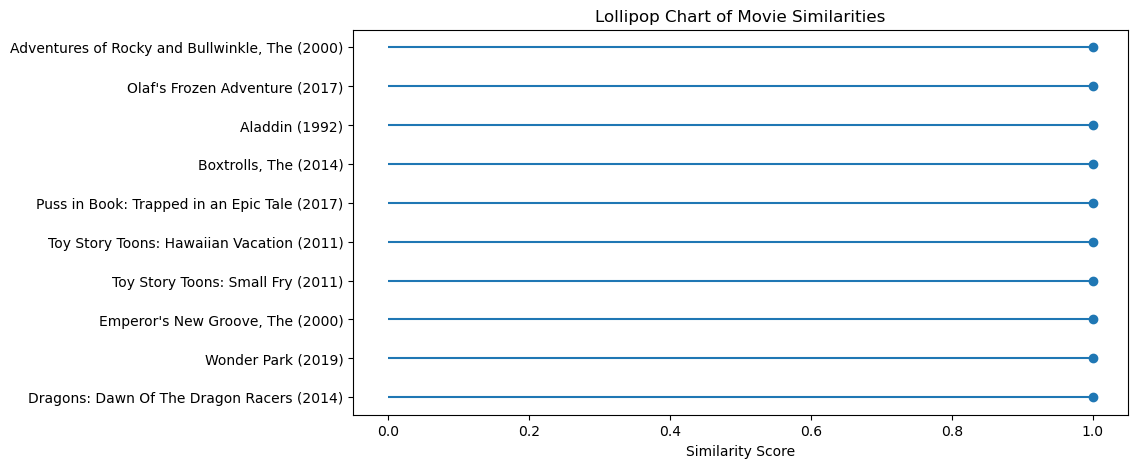

In [33]:
plt.figure(figsize=(10,5))
plt.hlines(y=recommended_df['title'],
           xmin=0,
           xmax=recommended_df['similarity_score'])
plt.plot(recommended_df['similarity_score'],
         recommended_df['title'], "o")
plt.xlabel("Similarity Score")
plt.title("Lollipop Chart of Movie Similarities")
plt.show()


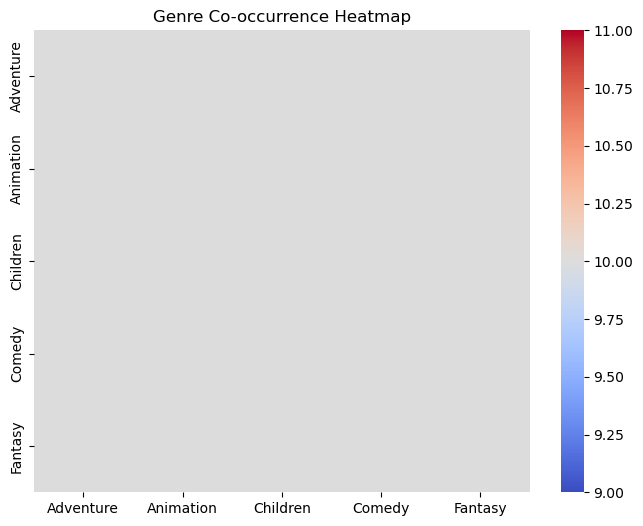

In [34]:
from sklearn.preprocessing import MultiLabelBinarizer
import seaborn as sns

genres_split = recommended_df['genres'].str.split()
mlb = MultiLabelBinarizer()
genre_matrix_rec = mlb.fit_transform(genres_split)

genre_co_occurrence = np.dot(genre_matrix_rec.T, genre_matrix_rec)

plt.figure(figsize=(8,6))
sns.heatmap(genre_co_occurrence,
            xticklabels=mlb.classes_,
            yticklabels=mlb.classes_,
            cmap='coolwarm')

plt.title("Genre Co-occurrence Heatmap")
plt.show()


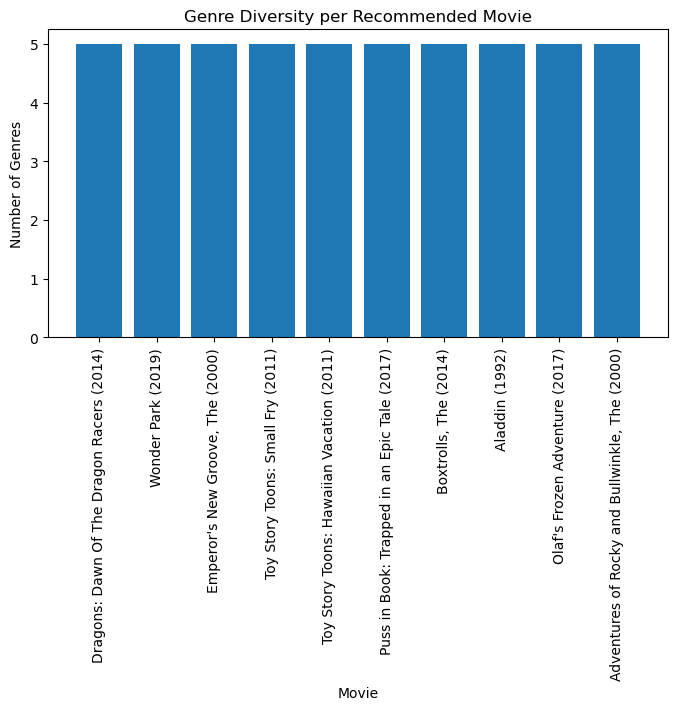

In [35]:
genre_count_per_movie = recommended_df['genres'].apply(lambda x: len(x.split()))

plt.figure(figsize=(8,4))
plt.bar(recommended_df['title'], genre_count_per_movie)
plt.xticks(rotation=90)
plt.xlabel("Movie")
plt.ylabel("Number of Genres")
plt.title("Genre Diversity per Recommended Movie")
plt.show()
